In [55]:
import warnings
warnings.filterwarnings('ignore')

In [56]:
#to unzip the data
#!unzip /content/BrainTumorData.zip?dl=0

In [57]:
import numpy as np
import matplotlib.pyplot as plt
import os
import math
import shutil
import glob

In [58]:
# count the number of images in the respective classes 0 - Brain Tumor and 1 - Healthy
ROOT_DIR1 = "D:\\College (2019-2023)\\4th Year(22-23)\\8th Sem\\Brain Tumor\\Backend\\BrainTumorData"
number_of_images = {}
total_training_images=0

# os.listdir gives all the items present in the directory
# os.path.join joins the parameter so that we can go to next directory

for dir in os.listdir(ROOT_DIR1):
  number_of_images[dir] = len(os.listdir(os.path.join(ROOT_DIR1,dir)))
  total_training_images+=number_of_images[dir]

print("Number of images in each folder of Training set:",number_of_images)
print("Total number of images in training set",total_training_images)

Number of images in each folder of Training set: {'healthy': 493, 'tumor': 2630}
Total number of images in training set 3123


**We will split the data such that 70% for Train Data , 15% for Validation and rest 15% for Testing**

In [59]:
# We will create a train folder

# ./ indicates the root directory or the current directory in which you are working
# Here the root directory is  "/content/drive/MyDrive/Colab Notebooks" so the folder will be made in this directory

# ROOT = "/content/drive/MyDrive/Colab Notebooks"
# if not os.path.exists(ROOT+'/Train'):
#   os.mkdir(os.path.join(ROOT,"Train"))

#   for dir in os.listdir(ROOT_DIR1):
#     os.makedirs(ROOT+'/Train/'+dir)

#     for img in np.random.choice(a = os.listdir(os.path.join(ROOT_DIR1,dir)) , size = (math.floor(70/100*number_of_images[dir])) , replace=False):
#       O = os.path.join(ROOT_DIR1,dir,img) # path and not the image
#       D = os.path.join(ROOT+'/Train',dir)
#       shutil.copy(O,D)
#       # os.remove(O)
# else:
#   print("Train Folder exists")

In [60]:
# Function which will create a folder and spilts the images acoordingly in that percentage.

def dataFolder(path , split):

  # ./ indicates the root directory or the current directory in which you are working
  # Here the root directory is  "/content/drive/MyDrive/Colab Notebooks" so the folder will be made in this directory
  ROOT = "D:\\College (2019-2023)\\4th Year(22-23)\\8th Sem\\Brain Tumor\\Backend\\"

  if not os.path.exists(ROOT+path):
    os.mkdir(ROOT+path)

    for dir in os.listdir(ROOT_DIR1):
      os.makedirs(ROOT+path+"/"+dir)

      for img in np.random.choice(a = os.listdir(os.path.join(ROOT_DIR1,dir)) , 
                                  size = (math.floor(split*number_of_images[dir])-5) , 
                                  replace=False):
        O = os.path.join(ROOT_DIR1,dir,img) # path and not the image
        D = os.path.join(ROOT+path,dir)
        shutil.copy(O,D)
        # os.remove(O)      # The image which wil copied in new directory(Train,Test,Validation) will be deleted from the original directory(here BrainTumorData)
  else:
    print(f"{path} Folder exists")

In [61]:
# Making separate folders with certain number of images
dataFolder("Train",0.70)
dataFolder("Test",0.15)
dataFolder("Validation",0.15)

Train Folder exists
Test Folder exists
Validation Folder exists


In [62]:
# To find the number of images in new folders i.e train,test and validation
# new_dir="/content/drive/MyDrive/Colab Notebooks/"+path
# noi={}
# for i in os.listdir(new_dir):
#   noi[i]=len(os.listdir(os.path.join(new_dir,i)))
# print(path,noi)



# **Model Build**

In [63]:
# keras tensorflow framework 
# 2D because images are 2D
# import tensorflow as tf
from keras.layers import Conv2D, MaxPool2D, Dropout, Flatten, Dense, BatchNormalization, GlobalAvgPool2D
from keras.models import Sequential   # for sequential model
# from keras_preprocessing.image import load_img, img_to_array   # for loading images and converting into vector or array
from keras.preprocessing.image import ImageDataGenerator      # inplace of load_img and img_to_array
import keras  # for any other libraries


In [64]:
# CNN  Model

model = Sequential()

# kernel_size is the size of convolution filter i.e 3x3
# activation function is relu
# input_shape is the size of image i.e 224,224 and 3 channels
# Number of filters are increasing because it will extract more and more features

model.add(Conv2D(filters=16 ,  kernel_size=(3,3) , activation='relu' , input_shape= (224,224,3)))   # Convolution layer ---for input layer input_shape . We can add padding='same' so that Conv2D shape will not reduce by 2

model.add(Conv2D(filters=36 ,  kernel_size=(3,3) , activation='relu' ))  # Convolution Layer
model.add(MaxPool2D(pool_size=(2,2)))     # Pooling Layer


model.add(Conv2D(filters=64 ,  kernel_size=(3,3) , activation='relu' ))  # Convolution Layer
model.add(MaxPool2D(pool_size=(2,2)))     # Pooling Layer


model.add(Conv2D(filters=128 ,  kernel_size=(3,3) , activation='relu' ))  # Convolution Layer
model.add(MaxPool2D(pool_size=(2,2)))     # Pooling Layer


model.add(Dropout(rate = 0.25))   # For Dropout--- so that model doesn't overfit----rate=25%

model.add(Flatten())  # For Flatten---doesn't take any parameter


model.add(Dense(units=64, activation= 'relu'))   # For Dense Layer

model.add(Dropout(rate=0.25))

model.add(Dense(units= 1 , activation= 'sigmoid'))  # Probability of being 1 or 0---output neuron will range from 0 to 1 and whichever value will be closer it belongs to that value

model.summary()


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 222, 222, 16)      448       
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 220, 220, 36)      5220      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 110, 110, 36)      0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 108, 108, 64)      20800     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 52, 52, 128)       73856     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 26, 26, 128)      

In [65]:
model.compile(optimizer='adam' , loss= keras.losses.binary_crossentropy , metrics=['accuracy'])

### **Preprocessing or Preparing our data using Data Generator**

In [66]:
# Creating a function for processing train images

def preprocessingImages1(path):
  """
  input : Path
  output : Generated Images
  """
  image_data = ImageDataGenerator(zoom_range= 0.2 , shear_range= 0.2 ,  rescale= 1/255 , horizontal_flip= True) # data augmentation
  image = image_data.flow_from_directory(directory = path, target_size = (224,224) , batch_size = 32 , class_mode= 'binary')  
  # taget_size should be same as input size i.e 224,224 and channel will be taken automatically
  # class_mode is binary because of binary classification

  return image



In [67]:
path = "D:\\College (2019-2023)\\4th Year(22-23)\\8th Sem\\Brain Tumor\\Backend\\Train"
train_data = preprocessingImages1(path)


Found 2175 images belonging to 2 classes.


In [68]:
# Creating a function for processing testing and validation images

def preprocessingImages2(path):
  """
  input : Path
  output : Generated Images
  """
  image_data = ImageDataGenerator(rescale= 1/255)
  image = image_data.flow_from_directory(directory = path, target_size = (224,224) , batch_size = 32 , class_mode= 'binary')  
  # taget_size should be same as input size i.e 224,224 and channel will be taken automatically
  # class_mode is binary because of binary classification

  return image



In [69]:
path = "D:\\College (2019-2023)\\4th Year(22-23)\\8th Sem\\Brain Tumor\\Backend\\Test"
test_data = preprocessingImages2(path)


Found 457 images belonging to 2 classes.


In [70]:
path = "D:\\College (2019-2023)\\4th Year(22-23)\\8th Sem\\Brain Tumor\\Backend\\Validation"
val_data = preprocessingImages2(path)

Found 457 images belonging to 2 classes.


In [71]:
# Early stopping and model check point
# early stopping will stop the model execution if it thinks that it is trained enough in that time frame

from keras.callbacks import EarlyStopping, ModelCheckpoint

# Early stopping
es = EarlyStopping(monitor="val_accuracy" , min_delta=0.01 , patience= 3 , verbose= 1 , mode= 'auto')

# Model checkpoint
mcp = ModelCheckpoint(monitor="val_accuracy" , filepath="D:\\College (2019-2023)\\4th Year(22-23)\\8th Sem\\Brain Tumor\\Backend\\bestmodel.h5" ,  verbose= 1 , save_best_only= True, mode= 'auto')

# cb = [es,mcp]   # array  callbacks

cb = [mcp]

# **Model Training**

In [72]:
# history
hs = model.fit_generator(generator= train_data ,
                         steps_per_epoch= 5 , 
                         epochs= 20 , 
                         verbose= 1 , 
                         validation_data= val_data , 
                         validation_steps= 4 ,
                         callbacks= cb)     # steps_per_epoch= 8 , epochs= 30 ,validation_steps= 16 , 

# Before running change the runtime to GPU otherwise it will take long time

Epoch 1/20
5/5 [==============================] - 19s 3s/step - loss: 0.6793 - accuracy: 0.8562 - val_loss: 0.5470 - val_accuracy: 0.8125

Epoch 00001: val_accuracy improved from -inf to 0.81250, saving model to D:\College (2019-2023)\4th Year(22-23)\8th Sem\Brain Tumor\Backend\bestmodel.h5
Epoch 2/20
5/5 [==============================] - 22s 4s/step - loss: 0.5593 - accuracy: 0.8313 - val_loss: 0.5300 - val_accuracy: 0.8203

Epoch 00002: val_accuracy improved from 0.81250 to 0.82031, saving model to D:\College (2019-2023)\4th Year(22-23)\8th Sem\Brain Tumor\Backend\bestmodel.h5
Epoch 3/20
5/5 [==============================] - 29s 6s/step - loss: 0.5037 - accuracy: 0.8438 - val_loss: 0.3645 - val_accuracy: 0.8906

Epoch 00003: val_accuracy improved from 0.82031 to 0.89062, saving model to D:\College (2019-2023)\4th Year(22-23)\8th Sem\Brain Tumor\Backend\bestmodel.h5
Epoch 4/20
5/5 [==============================] - 23s 4s/step - loss: 0.4613 - accuracy: 0.8562 - val_loss: 0.5335 - v

In [73]:
# Model Graphical Representation
h = hs.history
h.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

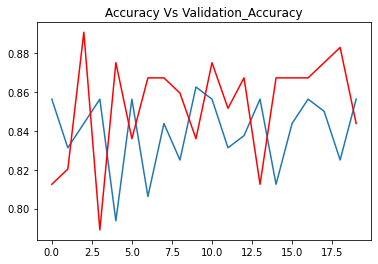

In [74]:
import matplotlib.pyplot as plt

plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'], c='red')

plt.title("Accuracy Vs Validation_Accuracy")
plt.show()

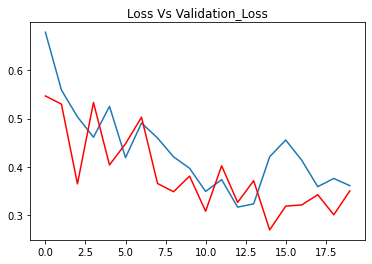

In [75]:
import matplotlib.pyplot as plt

plt.plot(h['loss'])
plt.plot(h['val_loss'], c='red')

plt.title("Loss Vs Validation_Loss")
plt.show()

# **Model Accuracy**

In [85]:
# Model Accuracy
from keras.models import load_model
model = load_model("D:\\College (2019-2023)\\4th Year(22-23)\\8th Sem\\Brain Tumor\\Backend\\bestmodel.h5")


In [86]:
acc = model.evaluate_generator(test_data)[1]
print(f"The accuracy of our model is {acc*100} %")

The accuracy of our model is 85.12035012245178 %


In [78]:
# !pip install Keras-Preprocessing
import math
from keras_preprocessing.image import load_img, img_to_array

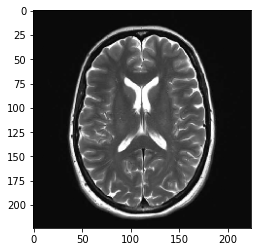

The Brain MRI is having a tumor


In [90]:
# giving that image path which we haven't preprocessed i.e from BrainTumorData folder

path = "D:\\College (2019-2023)\\4th Year(22-23)\\8th Sem\\Brain Tumor\\Backend\\BrainTumorData\\healthy\\6.jpg"

# path = "D:\\College (2019-2023)\\4th Year(22-23)\\8th Sem\\Brain Tumor\\Backend\\BrainTumorData\\tumor\\gg (25).jpg"

img = load_img(path ,  target_size= (224,224))
input_arr = img_to_array(img)/255   # divide by 255 to normalize the image


plt.imshow(input_arr)
plt.show()



input_arr.shape     #(224, 224, 3)

#  conv2d (Conv2D)  (None, 222, 222, 16) To expand the dimension in place of None we need 1
input_arr = np.expand_dims(input_arr, axis=0)

# np.argmax(model.predict(x), axis=-1), if your model does multi-class classification (e.g. if it uses a softmax last-layer activation).
# (model.predict(x) > 0.5).astype("int32"), if your model does binary classification (e.g. if it uses a sigmoid last-layer activation).

# model.predict_classes is no longer exists in recent versions. Instead use preds=model.predict and then np.argmax(preds)
# pred = model.predict_classes(input_arr)

# prediction = model.predict(input_arr)

prediction_classes = (model.predict(input_arr) > 0.5).astype("int32")[0][0]

# print(prediction_classes)


if prediction_classes==0:
  print("The Brain MRI has no tumor")
else:
  print("The Brain MRI is having a tumor")

In [80]:
train_data.class_indices

{'healthy': 0, 'tumor': 1}